In [ ]:
#Images downlaoded from Kaggle.com
#Here is the link: https://www.kaggle.com/datasets/emmarex/plantdisease/data
#If prefer through github, here it is: https://github.com/spMohanty/PlantVillage-Dataset/tree/master/raw/color

In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
# Function to load and preprocess images
def load_and_preprocess_image(path, size=(128, 128)):
    image = Image.open(path).convert('RGB')
    image = image.resize(size)
    return np.array(image) / 255.0  # Normalize pixel values

In [5]:
# Define file paths for bacterial spot and healthy images
bacterial_path = r"C:\Users\hando\OneDrive\Desktop\PlantVillage\Pepper__bell___Bacterial_spot"
healthy_path = r"C:\Users\hando\OneDrive\Desktop\PlantVillage\Pepper__bell___healthy"

# Get list of image file paths
bacterial_images = [os.path.join(bacterial_path, file)
                    for file in os.listdir(bacterial_path)
                    if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
healthy_images = [os.path.join(healthy_path, file)
                  for file in os.listdir(healthy_path)
                  if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

In [7]:
# Create dataset lists with labels: 1 for bacterial, 0 for healthy
images = bacterial_images + healthy_images
labels = [1] * len(bacterial_images) + [0] * len(healthy_images)


In [9]:
# Split the dataset into training and testing sets (e.g., 80/20 split)
train_files, test_files, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

In [11]:
# Load and preprocess images for training and testing
X_train = np.array([load_and_preprocess_image(file) for file in train_files])
X_test = np.array([load_and_preprocess_image(file) for file in test_files])
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [12]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: bacterial vs. healthy
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\hando\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.5274 - loss: 1.0720 - val_accuracy: 0.7652 - val_loss: 0.6006
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8397 - loss: 0.4792 - val_accuracy: 0.8889 - val_loss: 0.2948
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9214 - loss: 0.2367 - val_accuracy: 0.9242 - val_loss: 0.2110
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9066 - loss: 0.2281 - val_accuracy: 0.9318 - val_loss: 0.1591
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9360 - loss: 0.1601 - val_accuracy: 0.9217 - val_loss: 0.1823
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9626 - loss: 0.1225 - val_accuracy: 0.9394 - val_loss: 0.1253
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9731 - loss: 0.0942 - val_accuracy: 0.9571 - val_loss: 0.1314
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9552 - loss: 0.1133 - val_accuracy: 0.9545 - 

In [17]:
# Predict on test images
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [23]:
# Select 5 random images for display
num_images = 5
random_indices = random.sample(range(len(test_files)), num_images)
selected_images = [test_files[i] for i in random_indices]
selected_labels = [y_test[i] for i in random_indices]
selected_predictions = [predicted_classes[i] for i in random_indices]

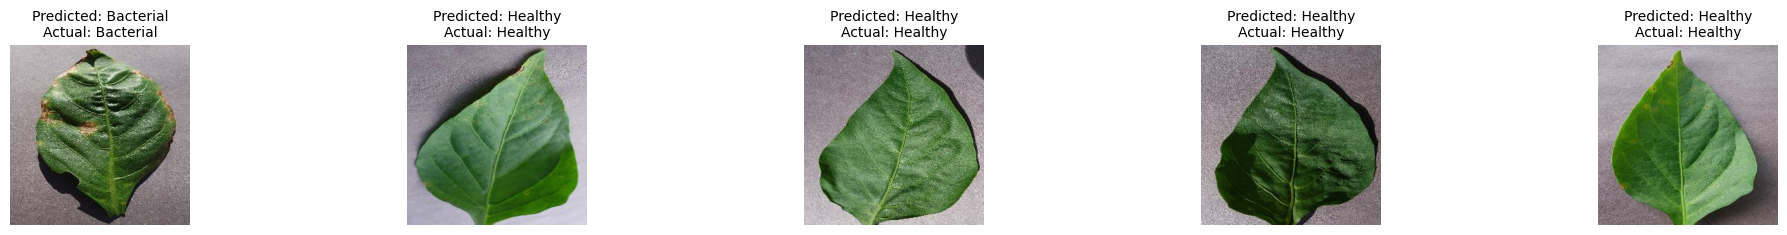

In [25]:
# Plot the images with predicted labels in a grid (10 rows × 5 columns)
plt.figure(figsize=(20, 20))

for i, file in enumerate(selected_images):
    image = Image.open(file).convert('RGB')

    predicted_label = "Bacterial" if selected_predictions[i] == 1 else "Healthy"
    actual_label = "Bacterial" if selected_labels[i] == 1 else "Healthy"

    plt.subplot(10, 5, i + 1)  # Grid: 10 rows × 5 columns
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()